In [62]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [63]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('tox21_dataset.csv')
df = df.dropna(subset=['NR-AR'])
df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
df = df.drop(columns='mol_id')
df

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 데이터 내의 결측값들을 제거합니다.

반응변수, NR-AR을 제외한 다른 반응변수들은 제거합니다.

## 데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [64]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다.
- 종속 변수는 마지막 열입니다.

In [65]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 모델을 생성합니다.

선택한 모델은 decision tree classifier입니다. 
- decision tree는 데이터를 분류하는 모델로, 데이터를 분류하기 위해 질문을 던지며, 이 질문에 대한 답변에 따라 데이터를 분류합니다. 여기서 질문은 데이터의 특성을 기준으로 합니다.
전처리를 수행한 데이터에 대해서 decision tree classifier을 학습시키고, 학습된 모델을 사용하여 예측을 수행해보겠습니다.

## decision tree classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수 (지니 불순도)
$$
I_G(t) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$

1. max_depth : 트리의 최대 깊이
2. min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
3. min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수
4. max_features : 최적의 분할을 위해 고려할 최대 피처 개수
5. max_leaf_nodes : 리프노드의 최대 개수
6. min_impurity_decrease : 불순도 감소 최소량
7. class_weight : 클래스 가중치
8. ccp_alpha : 최소 비용 복잡성 가지치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수
- 위의 하이퍼파라미터들은 모두 트리의 복잡도를 조절하는데 사용됩니다. 자세한 내용은 아래의 링크를 참고하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

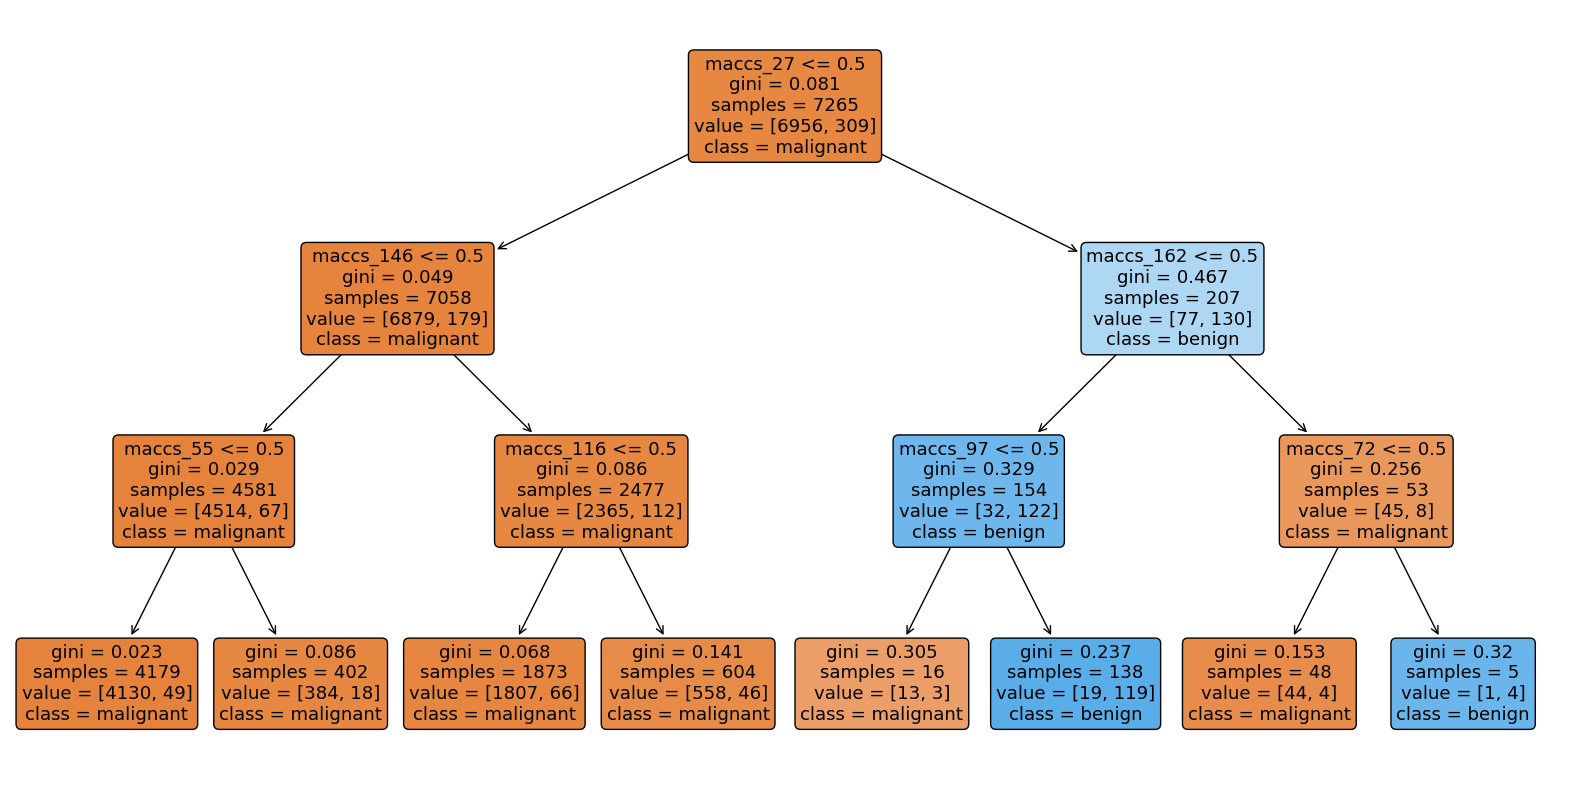

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # 플롯 사이즈 조정
plot_tree(model, filled=True, feature_names=X.columns, class_names=["malignant", "benign"], rounded=True)
plt.show()

## decision tree classifier의 시각화

위 그림은 결정나무의 시각화 결과입니다. 이를 통해 어떤 특성이 가장 중요한지 알 수 있습니다. 또한, 특성의 중요도를 확인할 수 있습니다.

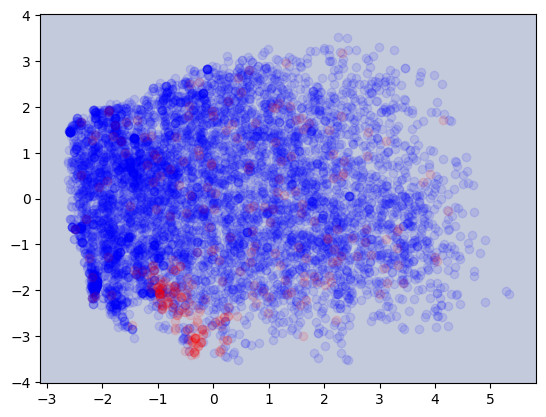

array([[6956,    0],
       [ 309,    0]])

In [67]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pca.fit(X_pca, y)

# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = model_pca.predict(X_new).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
plt.show()

confusion_matrix(y, model_pca.predict(X_pca))

## 결정 경계 시각화

위 그림은 PCA를 사용하여 피처를 2개로 줄인 후 decision tree classifier을 학습한 결과입니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다. 고차원 데이터를 2개 차원으로 줄였기 때문에 데이터가 너무 단순해져, decision tree classifier이 적절한 결정 경계를 찾아내지 못한 것을 확인할 수 있습니다.

In [68]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[6936,   20],
       [ 186,  123]])

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6942개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 20개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 186개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 123개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)